In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# **DATA IMPORT**

In [ ]:

ev_reg = pd.read_excel("States_Electric_Vehicle_Registrations_2018.xlsx",
                       skiprows=4)
all_reg = pd.read_excel("States_All_Vehicle_Registrations_2018.xlsx",
                        skiprows=6)
energy = pd.read_excel("States_Annual_Energy_Generation_Sources_1990_2019.xlsx",
                       skiprows=1)
state_codes = pd.read_excel("state_codes.xlsx")



In [ ]:
print("EV Registration Data:")
print(ev_reg.head())

EV Registration Data:
   Unnamed: 0       Alaska     530  Unnamed: 3 Unnamed: 4
0         NaN      Arizona   15000         NaN        NaN
1         NaN     Arkansas     520         NaN        NaN
2         NaN   California  256800         NaN        NaN
3         NaN     Colorado   11700         NaN        NaN
4         NaN  Connecticut    4450         NaN        NaN


In [ ]:
print("All Vehicle Registrations Data:")
print(all_reg.head())

All Vehicle Registrations Data:
  Unnamed: 0   Unnamed: 1 Unnamed: 2 Unnamed: 3   Unnamed: 4 Unnamed: 5  \
0        NaN  AUTOMOBILES        NaN        NaN        BUSES        NaN   
1      STATE  PRIVATE AND        NaN        NaN          NaN        NaN   
2        NaN   COMMERCIAL   PUBLICLY        NaN  PRIVATE AND   PUBLICLY   
3        NaN   (INCLUDING  OWNED (1)      TOTAL   COMMERCIAL  OWNED (1)   
4        NaN    TAXICABS)        NaN        NaN          NaN        NaN   

  Unnamed: 6   Unnamed: 7 Unnamed: 8 Unnamed: 9  Unnamed: 10 Unnamed: 11  \
0        NaN       TRUCKS        NaN        NaN  MOTORCYCLES         NaN   
1        NaN          NaN        NaN        NaN          NaN         NaN   
2        NaN  PRIVATE AND   PUBLICLY        NaN  PRIVATE AND    PUBLICLY   
3      TOTAL   COMMERCIAL  OWNED (1)      TOTAL   COMMERCIAL   OWNED (1)   
4        NaN          NaN        NaN        NaN          NaN         NaN   

  Unnamed: 12         Unnamed: 13 Unnamed: 14 Unnamed: 15  


In [ ]:
print("Energy Generation Data:")
print(energy.head())

Energy Generation Data:
   YEAR STATE               TYPE OF PRODUCER               ENERGY SOURCE  \
0  1990    AK  Total Electric Power Industry                       Total   
1  1990    AK  Total Electric Power Industry                        Coal   
2  1990    AK  Total Electric Power Industry  Hydroelectric Conventional   
3  1990    AK  Total Electric Power Industry                 Natural Gas   
4  1990    AK  Total Electric Power Industry                   Petroleum   

   GENERATION (Megawatthours)  
0                   5599506.0  
1                    510573.0  
2                    974521.0  
3                   3466261.0  
4                    497116.0  


In [ ]:
print(state_codes.head())

  state_code  state_name
0         AK      Alaska
1         AL     Alabama
2         AR    Arkansas
3         AZ     Arizona
4         CA  California




# **1.2 clean and process**
# Clean EV Registration Data

In [ ]:
ev_reg.columns = ["State", "EV_Registrations"]
ev_reg.dropna(inplace=True)
ev_reg.drop_duplicates(inplace=True)

print("Cleaned EV Registration Data:")
print(ev_reg.head())



Cleaned EV Registration Data:
         State  EV_Registrations
0      arizona             15000
1     arkansas               520
2   california            256800
3     colorado             11700
4  connecticut              4450


# --- Clean All Vehicle Registration Data ---


In [ ]:
all_reg.columns = ["State", "Total_Registrations"]
all_reg.dropna(inplace=True)
all_reg.drop_duplicates(inplace=True)

print("\nCleaned All Vehicle Data:")
print(all_reg.head())


Cleaned All Vehicle Data:
         State  Total_Registrations
5      Alabama         5.187267e+06
6      Alaska          7.821120e+05
7      Arizona         5.740531e+06
8     Arkansas         2.776352e+06
9  California          3.040368e+07


# --- Clean Energy Generation Data ---


In [ ]:
energy = pd.read_excel("States_Annual_Energy_Generation_Sources_1990_2019.xlsx", skiprows=1)

# Clean column names
energy.columns = energy.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("-", "_")

# Drop any extra garbage rows at the bottom if needed (based on 'year')
energy = energy[pd.to_numeric(energy['year'], errors='coerce').notnull()]

# Clean
energy.dropna(inplace=True)
energy.drop_duplicates(inplace=True)
energy.reset_index(drop=True, inplace=True)

# Preview
print("Final Cleaned Energy Data:")
print(energy.head())


Final Cleaned Energy Data:
   year state               type_of_producer               energy_source  \
0  1990    AK  Total Electric Power Industry                       Total   
1  1990    AK  Total Electric Power Industry                        Coal   
2  1990    AK  Total Electric Power Industry  Hydroelectric Conventional   
3  1990    AK  Total Electric Power Industry                 Natural Gas   
4  1990    AK  Total Electric Power Industry                   Petroleum   

   generation_(megawatthours)  
0                   5599506.0  
1                    510573.0  
2                    974521.0  
3                   3466261.0  
4                    497116.0  


# --- Clean State Codes ---


In [ ]:
state_codes.columns = ["State_Code", "State_Name"]
state_codes.dropna(inplace=True)
state_codes.drop_duplicates(inplace=True)


print("\nCleaned State Codes:")
print(state_codes.head())



Cleaned State Codes:
  State_Code  State_Name
0         AK      Alaska
1         AL     Alabama
2         AR    Arkansas
3         AZ     Arizona
4         CA  California


#  **TASK 2.1  Exploratory Data Analysis (EDA)**

In [ ]:
# Number of rows and columns
print("EV Registrations shape:", ev_reg.shape)
print("All Vehicles shape:", all_reg.shape)
print("Energy Data shape:", energy.shape)
print("State Codes shape:", state_codes.shape)



EV Registrations shape: (50, 2)
All Vehicles shape: (52, 2)
Energy Data shape: (53756, 5)
State Codes shape: (51, 2)


In [ ]:

print(ev_reg.info())
print(ev_reg.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   State             50 non-null     object
 1   EV_Registrations  50 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 932.0+ bytes
None
       EV_Registrations
count         50.000000
mean       21704.800000
std        83520.243794
min          170.000000
25%         1065.000000
50%         3830.000000
75%         9412.500000
max       543610.000000


In [ ]:
print("\nEnergy Data Info:")
print(energy.info())



Energy Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53756 entries, 0 to 53755
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   year                        53756 non-null  int64  
 1   state                       53756 non-null  object 
 2   type_of_producer            53756 non-null  object 
 3   energy_source               53756 non-null  object 
 4   generation_(megawatthours)  53756 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.1+ MB
None


In [ ]:
# All Vehicles Dataset
print("\nAll Vehicle Data Info:")
print(all_reg.info())



All Vehicle Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, 5 to 56
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   State                52 non-null     object
 1   Total_Registrations  52 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
None


In [ ]:
all_reg['Total_Registrations'] = pd.to_numeric(
    all_reg['Total_Registrations'].astype(str).str.replace(',', ''),
    errors='coerce'
)


In [ ]:
print(all_reg['Total_Registrations'].dtype)  # show float64
print(all_reg['Total_Registrations'].isna().sum())  # check how many became NaN

float64
0


# TASK 2.2  Data Visualization using Matplotlib & Seaborn

Visualize patterns and trends in Electric Vehicle registrations and energy generation data.

/tmp/ipython-input-1607233944.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_ev, x="EV_Registrations", y="State", palette=palette)


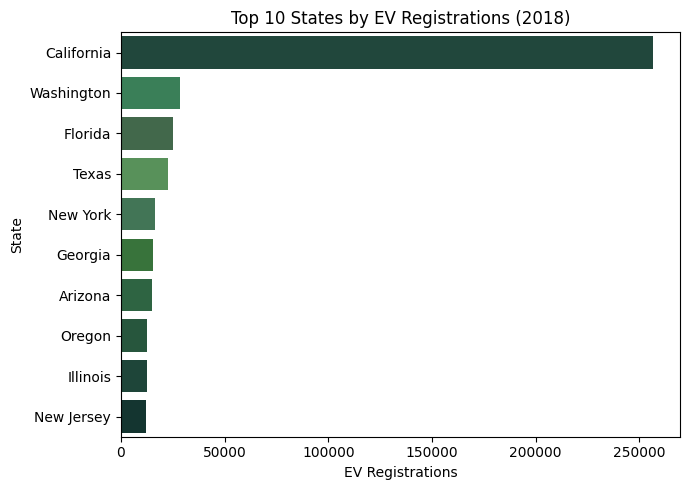

In [ ]:

ev_reg_cleaned = ev_reg[ev_reg['State'] != 'Total']

top10_ev = ev_reg_cleaned.sort_values(by="EV_Registrations", ascending=False).head(10)
plt.figure(figsize=( 7,5))
palette = [
    "#1b4d3e", "#2e8b57", "#3c6e47", "#4e9a51", "#397d54",
    "#2e7d32", "#256d3f", "#1f5e3d", "#174c3c", "#0f3a34"
]

sns.barplot(data=top10_ev, x="EV_Registrations", y="State", palette=palette)
plt.title("Top 10 States by EV Registrations (2018)")
plt.xlabel("EV Registrations")
plt.ylabel("State")
plt.tight_layout()
plt.show()


# 2. Energy Generation by Source (Overall)


/tmp/ipython-input-1511844974.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=energy_by_source.values, y=energy_by_source.index, palette=palette)


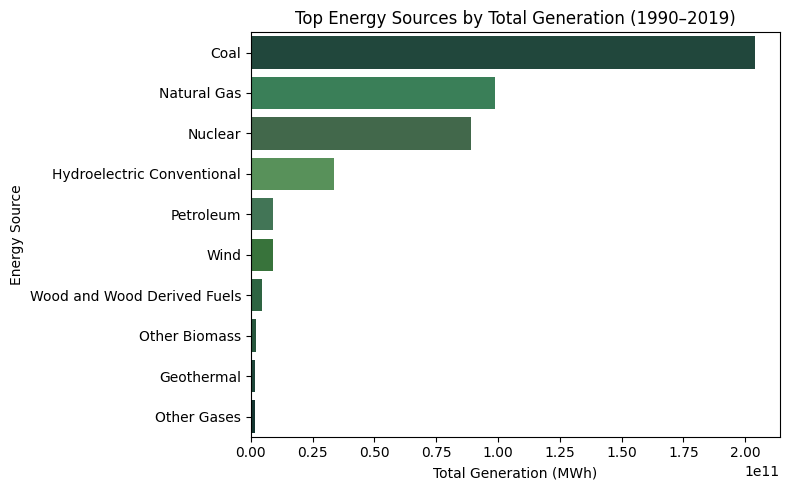

In [ ]:
energy_by_source = (
    energy[energy["energy_source"] != "Total"]
    .groupby("energy_source")["generation_(megawatthours)"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
palette = [
    "#1b4d3e", "#2e8b57", "#3c6e47", "#4e9a51", "#397d54",
    "#2e7d32", "#256d3f", "#1f5e3d", "#174c3c", "#0f3a34"
]

plt.figure(figsize=(8,5))
sns.barplot(x=energy_by_source.values, y=energy_by_source.index, palette=palette)
plt.title("Top Energy Sources by Total Generation (1990–2019)")
plt.xlabel("Total Generation (MWh)")
plt.ylabel("Energy Source")
plt.tight_layout()
plt.show()


#EV vs Total Vehicle Registrations (% Share)

/tmp/ipython-input-4001767857.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_share, x="EV_Share (%)", y="State", palette=palette)


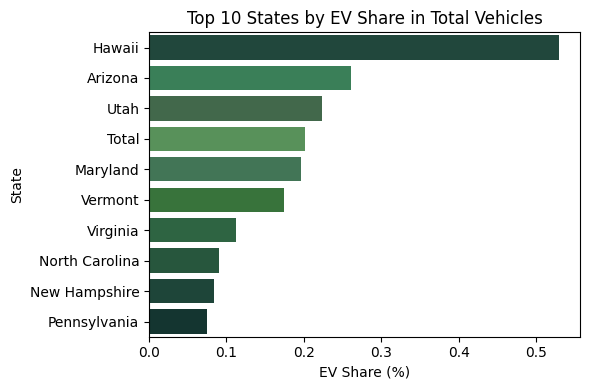

In [ ]:
# Merge datasets
ev_share = ev_reg.merge(all_reg, on="State", how="left")
ev_share["EV_Share (%)"] = (ev_share["EV_Registrations"] / ev_share["Total_Registrations"]) * 100

top10_share = ev_share.sort_values(by="EV_Share (%)", ascending=False).head(10)
palette = [
    "#1b4d3e", "#2e8b57", "#3c6e47", "#4e9a51", "#397d54",
    "#2e7d32", "#256d3f", "#1f5e3d", "#174c3c", "#0f3a34"
]

plt.figure(figsize=(6,4))
sns.barplot(data=top10_share, x="EV_Share (%)", y="State", palette=palette)
plt.title("Top 10 States by EV Share in Total Vehicles")
plt.xlabel("EV Share (%)")
plt.ylabel("State")
plt.tight_layout()
plt.show()


# **CORRELATION ANALYSIS**


In [ ]:
# STEP 1: Clean state_codes data
state_codes.columns = ["State_Code", "State_Name"]
state_codes['State_Name'] = state_codes['State_Name'].str.strip().str.lower()
state_codes['State_Code'] = state_codes['State_Code'].str.strip().str.lower()

# STEP 2: Merge EV data with state_codes (standardize)
ev_reg['State'] = ev_reg['State'].str.strip().str.lower()
ev_reg = ev_reg.merge(state_codes, left_on='State', right_on='State_Name', how='left')

# STEP 3: Filter energy data for year 2018 (excluding 'Total')
energy_2018 = energy[(energy['year'] == 2018) & (energy['energy_source'] != 'Total')]

# STEP 4: Pivot energy data → rows = states, columns = energy sources
energy_pivot = energy_2018.pivot_table(
    index='state',
    columns='energy_source',
    values='generation_(megawatthours)',
    aggfunc='sum',
    fill_value=0
).reset_index()

# STEP 5: Merge EV data with energy data using state codes
energy_pivot['state'] = energy_pivot['state'].str.strip().str.lower()
merged_df = ev_reg.merge(energy_pivot, left_on='State_Code', right_on='state', how='inner')
merged_df.drop(columns=['state', 'State_Name', 'State_Code'], inplace=True)


print("Merged EV + Energy Data:")
print(merged_df.head())
print("Shape:", merged_df.shape)


✅ Merged EV + Energy Data:
         State  EV_Registrations State_Code_x State_Name_x State_Code_y  \
0      arizona             15000           AZ      arizona           az   
1     arkansas               520           AR     arkansas           ar   
2   california            256800           CA   california           ca   
3     colorado             11700           CO     colorado           co   
4  connecticut              4450           CT  connecticut           ct   

  State_Name_y        Coal  Geothermal  Hydroelectric Conventional  \
0      arizona  61489246.0         0.0                  13964484.0   
1     arkansas  59992202.0         0.0                   6017550.0   
2   california    562656.0  23353682.0                  52661333.0   
3     colorado  52764120.0         0.0                   3650770.0   
4  connecticut    659402.0         0.0                   1110638.0   

   Natural Gas     Nuclear      Other  Other Biomass  Other Gases  Petroleum  \
0   74336150.0  62194

In [ ]:
# STEP 1: Keep only numeric columns (remove all state-related string columns)
corr_data = merged_df.select_dtypes(include='number')

# STEP 2: Compute correlation matrix
correlation_matrix = corr_data.corr()

# STEP 3: Get correlation of EV Registrations with energy sources
ev_corr = correlation_matrix[['EV_Registrations']].sort_values(by='EV_Registrations', ascending=False)

# Show correlation values
print(" Correlation of EV Registrations with Energy Sources:")
print(ev_corr)


🔗 Correlation of EV Registrations with Energy Sources:
                                EV_Registrations
EV_Registrations                        1.000000
Solar Thermal and Photovoltaic          0.946913
Geothermal                              0.939900
Other Biomass                           0.633702
Wood and Wood Derived Fuels             0.368933
Hydroelectric Conventional              0.318549
Natural Gas                             0.314577
Other Gases                             0.282095
Other                                   0.263846
Wind                                    0.157981
Nuclear                                 0.095703
Petroleum                              -0.031084
Pumped Storage                         -0.039783
Coal                                   -0.098565


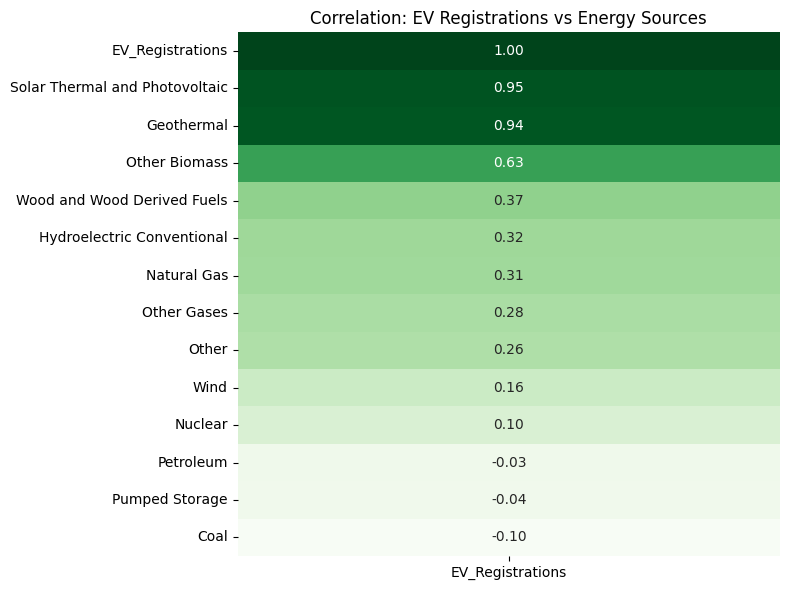

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(ev_corr, annot=True, cmap="Greens", fmt=".2f", cbar=False)
plt.title("Correlation: EV Registrations vs Energy Sources")
plt.tight_layout()
plt.show()


# TIME SERIES ANALYSIS

Time Trend of Renewable Energy (1990–2019)



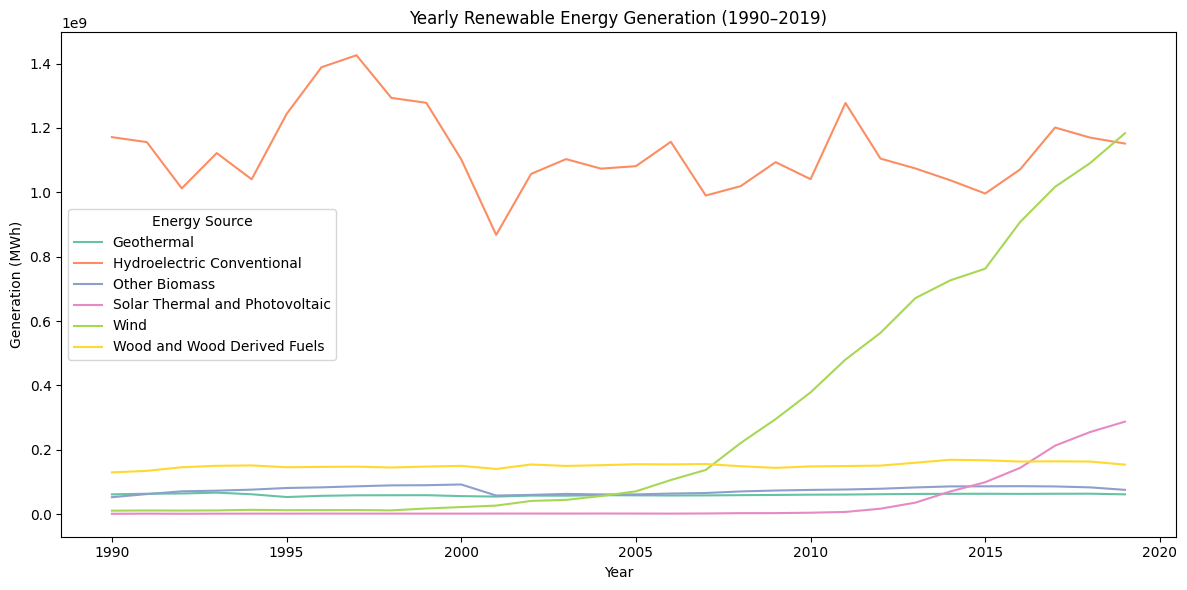

In [ ]:
# STEP 1: Filter renewable sources only
renewables = [
    "Wind", "Solar Thermal and Photovoltaic", "Hydroelectric Conventional",
    "Wood and Wood Derived Fuels", "Other Biomass", "Geothermal"
]

# STEP 2: Filter only those rows from energy data
renewable_energy = energy[energy['energy_source'].isin(renewables)]

# STEP 3: Group by year and energy source to calculate total generation
yearly_renewable_trend = renewable_energy.groupby(['year', 'energy_source'])['generation_(megawatthours)'].sum().reset_index()

# STEP 4: Plot using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_renewable_trend, x='year', y='generation_(megawatthours)', hue='energy_source', palette='Set2')
plt.title("Yearly Renewable Energy Generation (1990–2019)")
plt.xlabel("Year")
plt.ylabel("Generation (MWh)")
plt.legend(title="Energy Source")
plt.tight_layout()
plt.show()


In [ ]:
# Calculate year-over-year percentage change for each energy source
trend_analysis = yearly_renewable_trend.copy()

# Sort by energy_source and year
trend_analysis.sort_values(by=['energy_source', 'year'], inplace=True)

# Calculate percent change
trend_analysis['YoY_%_Change'] = trend_analysis.groupby('energy_source')['generation_(megawatthours)'].pct_change() * 100

# Show sample trend
print(trend_analysis.tail(10))  # check for 2019


     year                energy_source  generation_(megawatthours)  \
125  2010  Wood and Wood Derived Fuels                1.486886e+08   
131  2011  Wood and Wood Derived Fuels                1.497963e+08   
137  2012  Wood and Wood Derived Fuels                1.511965e+08   
143  2013  Wood and Wood Derived Fuels                1.601101e+08   
149  2014  Wood and Wood Derived Fuels                1.693589e+08   
155  2015  Wood and Wood Derived Fuels                1.677140e+08   
161  2016  Wood and Wood Derived Fuels                1.637889e+08   
167  2017  Wood and Wood Derived Fuels                1.644941e+08   
173  2018  Wood and Wood Derived Fuels                1.637446e+08   
179  2019  Wood and Wood Derived Fuels                1.541735e+08   

     YoY_%_Change  
125      3.112389  
131      0.744933  
137      0.934768  
143      5.895396  
149      5.776494  
155     -0.971237  
161     -2.340362  
167      0.430535  
173     -0.455605  
179     -5.845142  


# **Identify Trends (Seasonal / Long-Term)**

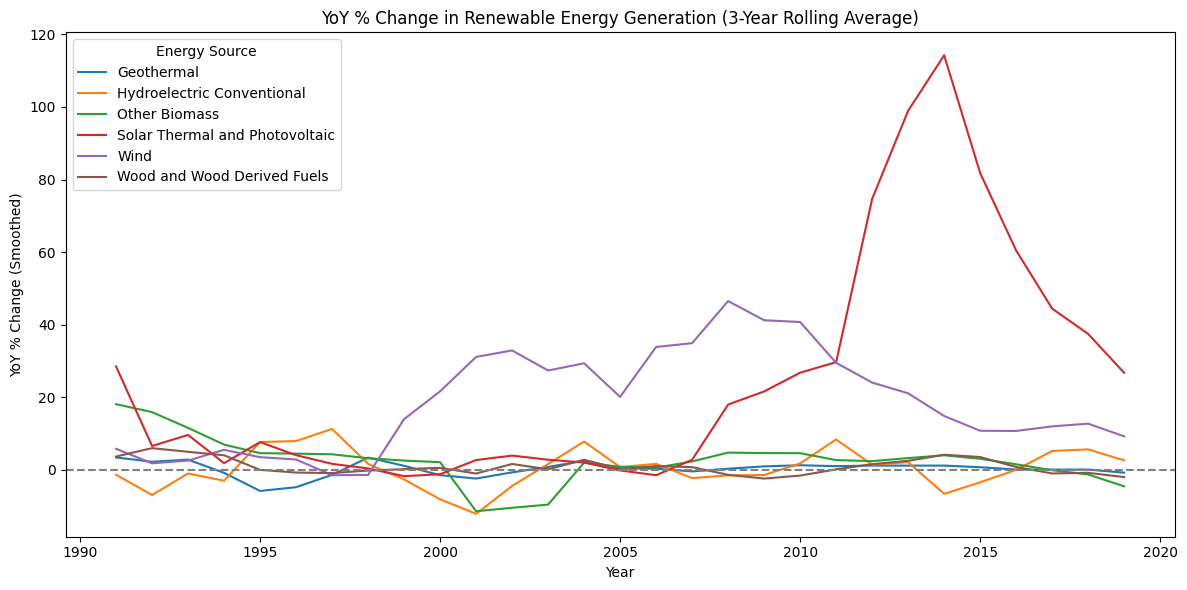

In [ ]:
# Apply rolling average to smooth the % change line
trend_analysis['Smoothed_Change'] = trend_analysis.groupby('energy_source')['YoY_%_Change'].transform(lambda x: x.rolling(window=3, min_periods=1).mean())

plt.figure(figsize=(12,6))
sns.lineplot(data=trend_analysis, x='year', y='Smoothed_Change', hue='energy_source', palette='tab10')
plt.axhline(0, linestyle='--', color='gray')
plt.title("YoY % Change in Renewable Energy Generation (3-Year Rolling Average)")
plt.ylabel("YoY % Change (Smoothed)")
plt.xlabel("Year")
plt.legend(title="Energy Source")
plt.tight_layout()
plt.show()


# **Geospatial Analysis (Map Visualization)**
5.1: Choropleth Map of EV Registrations by State


In [ ]:
# Just use what's already present in ev_reg (State_Code is already merged earlier)
choropleth_data = ev_reg[['State_Code', 'EV_Registrations']].copy()

# Make sure state codes are in uppercase (required by plotly)
choropleth_data['State_Code'] = choropleth_data['State_Code'].str.upper()

# Preview
print(choropleth_data.head())


  State_Code  EV_Registrations
0         AZ             15000
1         AR               520
2         CA            256800
3         CO             11700
4         CT              4450


In [ ]:
fig = px.choropleth(
    data_frame=choropleth_data,
    locations='State_Code',
    locationmode='USA-states',
    color='EV_Registrations',
    scope="usa",
    color_continuous_scale="Greens",
    title="EV Registrations by State (2018)"
)

fig.show()


In [ ]:
# Step 1: Import and clean EV data
ev_reg = pd.read_excel("States_Electric_Vehicle_Registrations_2018.xlsx", skiprows=4, usecols="B:C")
ev_reg.columns = ['State', 'EV_Registrations']
ev_reg.dropna(inplace=True)
ev_reg.drop_duplicates(inplace=True)
ev_reg['State'] = ev_reg['State'].str.strip().str.lower()


In [ ]:
# Step 2: Import and clean state codes
state_codes.columns = ['State_Code', 'State_Name']
state_codes['State_Code'] = state_codes['State_Code'].str.strip().str.lower()
state_codes['State_Name'] = state_codes['State_Name'].str.strip().str.lower()


In [ ]:
# Step 3: Merge EV with state codes
ev_data = ev_reg.merge(state_codes, left_on='State', right_on='State_Name', how='left')

# Keep only required columns
ev_data = ev_data[['State', 'EV_Registrations', 'State_Code']]


In [ ]:
print(ev_data.head())


         State  EV_Registrations State_Code
0      arizona             15000         az
1     arkansas               520         ar
2   california            256800         ca
3     colorado             11700         co
4  connecticut              4450         ct


In [ ]:
# Step 4: Filter for renewables in 2018
renewables = [
    "Wind", "Solar Thermal and Photovoltaic", "Hydroelectric Conventional",
    "Wood and Wood Derived Fuels", "Other Biomass", "Geothermal"
]

renewable_2018 = energy[
    (energy['year'] == 2018) & (energy['energy_source'].isin(renewables))
]

# Group by state and get total renewable generation
renewable_by_state = renewable_2018.groupby('state')['generation_(megawatthours)'].sum().reset_index()
renewable_by_state['state'] = renewable_by_state['state'].str.strip().str.lower()


In [ ]:
print(renewable_by_state.head())


  state  generation_(megawatthours)
0    ak                   3729428.0
1    al                  29893540.0
2    ar                   9155756.0
3    az                  25744607.0
4    ca                 169926111.0


In [ ]:


# Merge by state code
merged_5_2 = renewable_by_state.merge(ev_data, left_on='state', right_on='State_Code', how='inner')

# Final cleaned columns
merged_5_2 = merged_5_2[['State', 'EV_Registrations', 'generation_(megawatthours)', 'State_Code']]
merged_5_2['State_Code'] = merged_5_2['State_Code'].str.upper()


In [ ]:
print(merged_5_2.head())
print(merged_5_2.shape)


         State  EV_Registrations  generation_(megawatthours) State_Code
0     arkansas               520                   9155756.0         AR
1      arizona             15000                  25744607.0         AZ
2   california            256800                 169926111.0         CA
3     colorado             11700                  25594684.0         CO
4  connecticut              4450                   2857478.0         CT
(49, 4)


# **Compare EV Distribution with Renewable Energy Projects (Alternate)**
We'll compare EV registrations with state-wise renewable energy generation
(because we don’t have exact project locations).



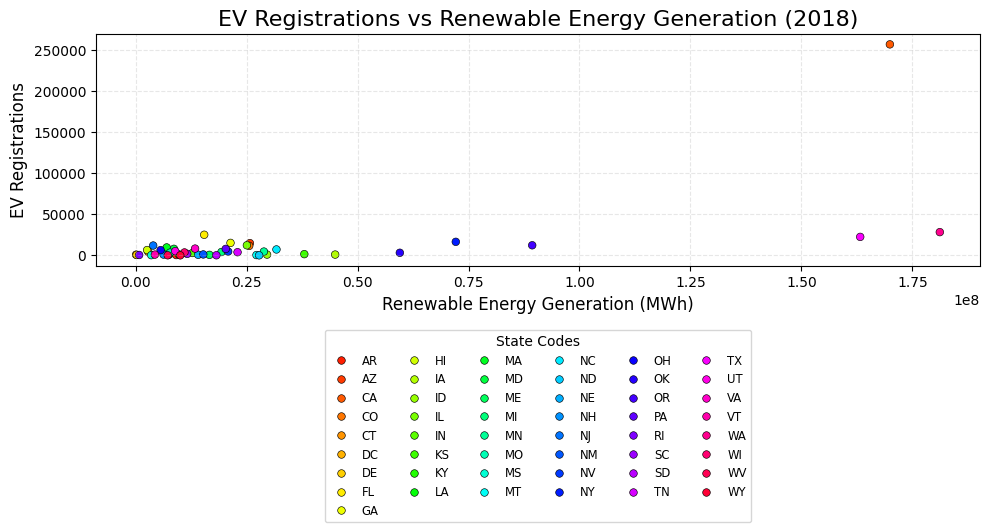

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))  # Bigger size for legend

# Plot with legend ON
scatter = sns.scatterplot(
    data=merged_5_2,
    x='generation_(megawatthours)',
    y='EV_Registrations',
    hue='State_Code',
    palette='hsv',
    s=30,
    edgecolor='black'
)

# Title and labels
plt.title("EV Registrations vs Renewable Energy Generation (2018)", fontsize=16)
plt.xlabel("Renewable Energy Generation (MWh)", fontsize=12)
plt.ylabel("EV Registrations", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)

# Remove labels from individual dots
# (skip plt.text part)

# Place legend below, in multiple columns
plt.legend(
    title='State Codes',
    bbox_to_anchor=(0.5, -0.25),  # Push legend below the plot
    loc='upper center',
    ncol=6,  # Show in 6 columns
    fontsize='small',
    title_fontsize='medium',
    frameon=True
)

plt.tight_layout()
plt.show()
